#### From Author:

##### Folder structure
There are 15 different kind of fruits consisting of 44406 images. For 15 different categories
there are 15 folders in our dataset and their sub-categories of fruits were kept in sub-folders like
for apple there is one folder and inside the main folder there are six sub-folders for subcategories.
Sub-categories of all fruits are exit in their relevant sub-folders

##### Data collection
The database used in this study is comprising of 44406 fruit images, which we collected
in a period of 6 months. The images where made with in our lab’s environment under different
scenarios which we mention below. We captured all the images on a clear background with
resolution of 320×258 pixels. We used HD Logitech web camera to took the pictures. During
collecting this database, we created all kind of challenges, which, we have to face in real-world
recognition scenarios in supermarket and fruit shops such as light, shadow, sunshine, pose
variation, to make our model robust for, it might be necessary to cope with illumination
variation, camera capturing artifacts, specular reflection shading and shadows. We tested our
model’s robustness in all scenarios and it perform quit well.
All of images were stored in RGB color-space at 8 bits per channel. The images were
gathered at various day times of the day and in different days for the same category. These
features increase the dataset variability and represent more realistic scenario. The Images had
large variation in quality and lighting. Illumination is one of those variations in imagery. In fact,
illumination can make two images of same fruit less similar than two images of different kind
of fruits. We were used our own intelligent weight machine and camera to captured all images.
The fruit dataset was collected under relatively unconstrained conditions. There are also images
with the room light on and room lights off, moved the camera and intelligent weight machine
near to the windows of our lab than open windows, closed windows, open window curtains,
closed curtains. For a real application in a supermarket, it might be necessary to cope with
illumination variation, camera capturing artifacts, specular reflection shading and shadows.
Below are the few conditions which we were considered during collected dataset.

##### Pose Variations with different categories of fruits
- Variability on the number of elements of fruits
- Used HD camera with 5-megapixel snapshots
- Same color but different Category fruits images with illumination variation
- Cropping and partial occlusion
- Different color same category fruit images
- Different lighting conditions (e.g. fluorescent, natural light some of the fruits shops
- and supermarkets are without sunshine so it can easily affect the recognition system
- Six different kind of apple fruit images
- Three categories of mango fruit with specular reflecting shading and shadows
- Three categories of Kiwi fruit images
- Natural and artificial lighting effect on images
- Partial occlusion with hand

Israr Hussain,, Qianhua He, Zhuliang Chen, & Wei Xie. (2018). Fruit Recognition dataset (Version V 1.0) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.1310165

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import random
import datetime

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:
plt.rcParams['font.sans-serif']
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_style("white")
sns.set_context("paper", font_scale=1.8)
sns.set_palette("GnBu_r", 10)

In [4]:
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [5]:
np.random.seed(42)

In [6]:
train_dir = "../Image-Classification/dataset/train/"
test_dir = "../Image-Classification/dataset/test/"
os.path.exists(train_dir), os.path.exists(test_dir)

(True, True)

In [7]:
for subfolder in [train_dir, test_dir]:
    print('{} contains:'.format(subfolder))
    subfolders = dict(
            zip([
                fruit for fruit in os.listdir(subfolder)
                if os.path.isdir(subfolder + fruit)
            ], [
                len([
                    img for img in os.listdir(subfolder + fruit)
                    if any(img.endswith(i) for i in ['jpg', 'jpeg', 'png'])
                ]) for fruit in os.listdir(subfolder)
                if os.path.isdir(subfolder + fruit)
            ]))
    print('{} images'.format(int(sum(list(subfolders.values())))))
    display(subfolders)

../Image-Classification/dataset/train/ contains:
1125 images


{'Apple': 75,
 'Pear': 75,
 'Pomegranate': 75,
 'StarFruit': 75,
 'Tomatoes': 75,
 'Kiwi': 75,
 'Guava': 75,
 'Plum': 75,
 'Mango': 75,
 'Muskmelon': 75,
 'Banana': 75,
 'DragonFruit': 75,
 'Persimmon': 75,
 'Orange': 75,
 'Peach': 75}

../Image-Classification/dataset/test/ contains:
375 images


{'Apple': 25,
 'Pear': 25,
 'Pomegranate': 25,
 'StarFruit': 25,
 'Tomatoes': 25,
 'Kiwi': 25,
 'Guava': 25,
 'Plum': 25,
 'Mango': 25,
 'Muskmelon': 25,
 'Banana': 25,
 'DragonFruit': 25,
 'Persimmon': 25,
 'Orange': 25,
 'Peach': 25}

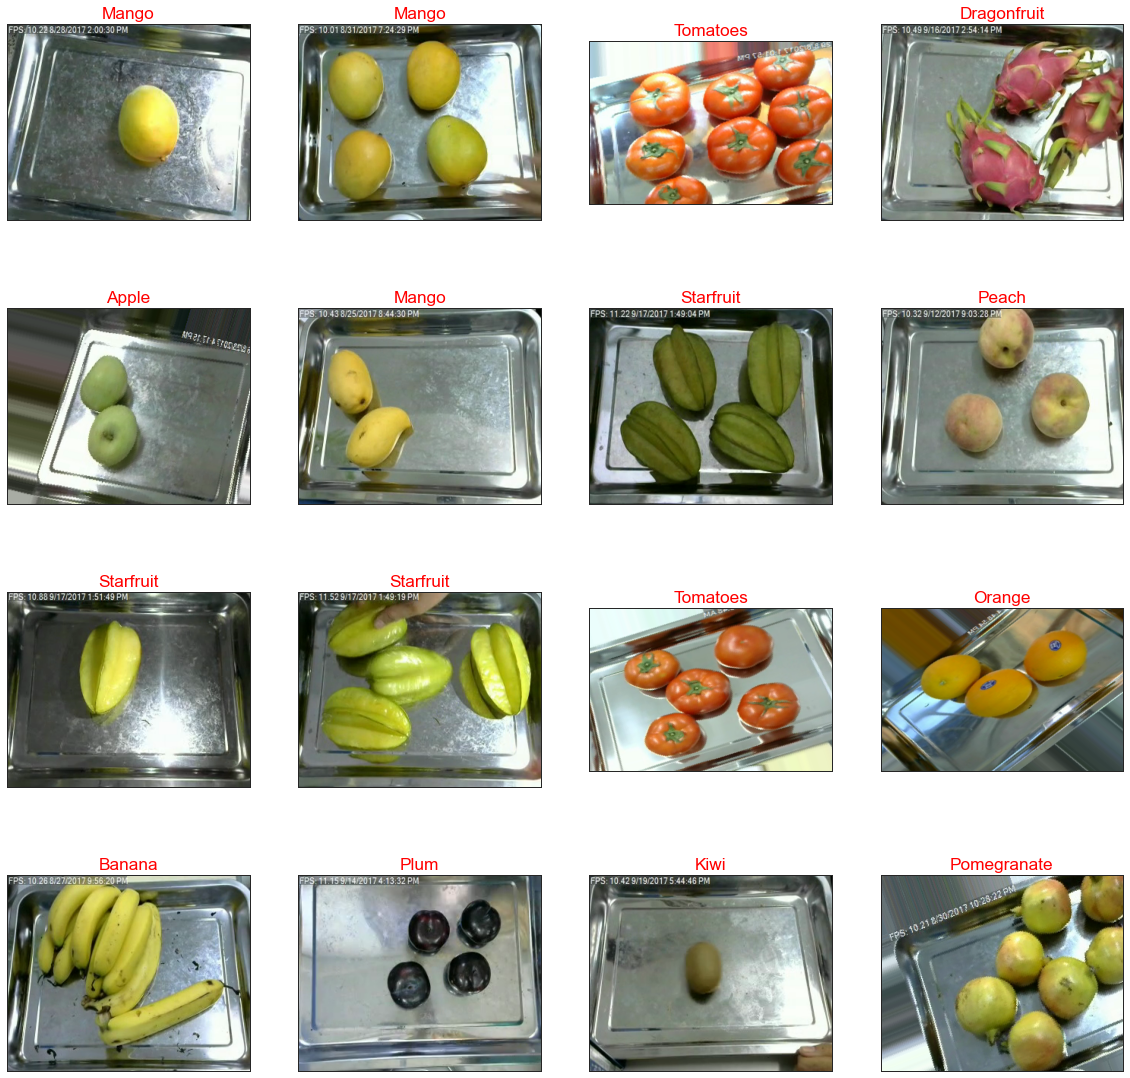

In [8]:
fig = plt.figure(figsize=(20, 5 * 4))
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    sample_fruit = random.choice([
        folder for folder in os.listdir(train_dir)
        if os.path.isdir(os.path.join(train_dir, folder))
    ])
    sample_image = os.path.join(
        train_dir, sample_fruit,
        random.choice(os.listdir(os.path.join(train_dir, sample_fruit))))
    img = mpimg.imread(sample_image)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(sample_fruit.title(), color="red")
plt.show()
del img

In [9]:
if os.path.exists('../Image-Classification/augmented/'):
    shutil.rmtree('../Image-Classification/augmented/')
    
# os.mkdir('../Image-Classification/augmented/')
# os.mkdir('../Image-Classification/augmented/train')
# os.mkdir('../Image-Classification/augmented/val')
# os.mkdir('../Image-Classification/augmented/test')

In [10]:
target_size = (100, 100)

In [11]:
augmentation = ImageDataGenerator(
    rescale=1. / 255,
    #                                   featurewise_center=True,
    #                                   featurewise_std_normalization=True,
    zoom_range=0.3,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2,
    preprocessing_function=None)

In [12]:
train_generator = augmentation.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    save_prefix='train',
#     save_to_dir='../Image-Classification/augmented/train',
    interpolation='nearest',
    subset='training')

Found 900 images belonging to 15 classes.


In [13]:
print('{} images for {}'.format(f'{train_generator.n:,}',
                                train_generator.subset))
print('{} input shape'.format(train_generator.image_shape))
print('{} classes'.format(train_generator.num_classes))

900 images for training
(100, 100, 3) input shape
15 classes


In [14]:
validation_generator = augmentation.flow_from_directory(
    train_dir,
    target_size=target_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    save_prefix='val',
#     save_to_dir='../Image-Classification/augmented/val',
    interpolation='nearest',
    subset='validation')

Found 225 images belonging to 15 classes.


In [15]:
print('{} images for {}'.format(f'{validation_generator.n:,}',
                                validation_generator.subset))
print('{} input shape'.format(validation_generator.image_shape))
print('{} classes'.format(validation_generator.num_classes))

225 images for validation
(100, 100, 3) input shape
15 classes


In [16]:
test_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory(
    test_dir,
    target_size=target_size,
    class_mode='categorical',
    shuffle=True,
    seed=42,
    save_prefix='test',
#     save_to_dir='../Image-Classification/augmented/test',
    interpolation='nearest')

Found 375 images belonging to 15 classes.


In [17]:
print('{} images for testing'.format(f'{test_generator.n:,}'))
print('{} input shape'.format(test_generator.image_shape))
print('{} classes'.format(test_generator.num_classes))

375 images for testing
(100, 100, 3) input shape
15 classes


In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import metrics, losses, optimizers, callbacks
from keras.backend import clear_session
from keras.utils import plot_model

In [19]:
input_shape = train_generator.image_shape
input_shape

(100, 100, 3)

In [27]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(15, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1920064   
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 15)                495       
Total params: 1,927,855
Trainable params: 1,927,855
Non-trainable params: 0
______________________________________________

In [28]:
clear_session()

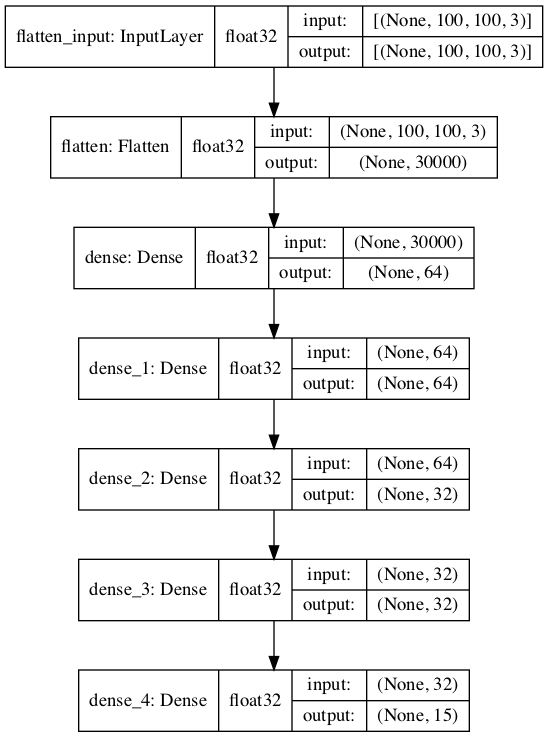

In [29]:
plot_model(model, show_shapes=True, show_dtype=True, expand_nested=True)

In [30]:
model.compile(optimizer=optimizers.SGD(),
              loss=losses.CategoricalCrossentropy(),
              metrics=[metrics.Accuracy(),
                       metrics.CategoricalAccuracy()])

In [24]:
model_path= '../Image-Classification/models/'
if not os.path.exists(model_path):
    os.mkdir(model_path)

In [31]:
model_checkpoint = callbacks.ModelCheckpoint(filepath=os.path.join(
    model_path, 'best model {}.h5'.format(
        datetime.datetime.utcnow().strftime("%Y%m%d_%H%M"))),
                                             monitor='val_loss',
                                             verbose=1,
                                             save_best_only=True,
                                             save_freq='epoch')
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

In [32]:
history = model.fit(train_generator,
                    steps_per_epoch=None,
                    epochs=100,
                    verbose=2,
                    validation_data=validation_generator,
                    validation_steps=None,
                    validation_freq=1,
                    shuffle=True,
                    use_multiprocessing=False,
                    workers=1,
                    initial_epoch=0,
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
29/29 - 6s - loss: 2.7343 - accuracy: 0.0000e+00 - categorical_accuracy: 0.0667 - val_loss: 2.7141 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.0667

Epoch 00001: val_loss improved from inf to 2.71410, saving model to ../Image-Classification/models/best model 20210715_1644.h5
Epoch 2/100
29/29 - 5s - loss: 2.7162 - accuracy: 0.0000e+00 - categorical_accuracy: 0.0689 - val_loss: 2.7132 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.0667

Epoch 00002: val_loss improved from 2.71410 to 2.71322, saving model to ../Image-Classification/models/best model 20210715_1644.h5
Epoch 3/100
29/29 - 6s - loss: 2.7142 - accuracy: 0.0000e+00 - categorical_accuracy: 0.0644 - val_loss: 2.7177 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.0622

Epoch 00003: val_loss did not improve from 2.71322
Epoch 4/100
29/29 - 6s - loss: 2.7140 - accuracy: 0.0000e+00 - categorical_accuracy: 0.0633 - val_loss: 2.7319 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.0


Epoch 00033: val_loss did not improve from 2.61908
Epoch 34/100
29/29 - 6s - loss: 2.6044 - accuracy: 0.0000e+00 - categorical_accuracy: 0.1356 - val_loss: 2.6160 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.1467

Epoch 00034: val_loss improved from 2.61908 to 2.61598, saving model to ../Image-Classification/models/best model 20210715_1644.h5
Epoch 35/100
29/29 - 6s - loss: 2.6013 - accuracy: 0.0000e+00 - categorical_accuracy: 0.1222 - val_loss: 2.6216 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.1289

Epoch 00035: val_loss did not improve from 2.61598
Epoch 36/100
29/29 - 6s - loss: 2.5967 - accuracy: 0.0000e+00 - categorical_accuracy: 0.1356 - val_loss: 2.7245 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.0444

Epoch 00036: val_loss did not improve from 2.61598
Epoch 37/100
29/29 - 6s - loss: 2.6033 - accuracy: 0.0000e+00 - categorical_accuracy: 0.1200 - val_loss: 2.5675 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.1556

Epoch 00037: va

29/29 - 6s - loss: 2.3190 - accuracy: 0.0000e+00 - categorical_accuracy: 0.2167 - val_loss: 2.5191 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.1822

Epoch 00067: val_loss did not improve from 2.34714
Epoch 68/100
29/29 - 5s - loss: 2.3802 - accuracy: 0.0000e+00 - categorical_accuracy: 0.2011 - val_loss: 2.3835 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.1644

Epoch 00068: val_loss did not improve from 2.34714
Epoch 69/100
29/29 - 5s - loss: 2.3615 - accuracy: 0.0000e+00 - categorical_accuracy: 0.1922 - val_loss: 2.3587 - val_accuracy: 0.0000e+00 - val_categorical_accuracy: 0.2133

Epoch 00069: val_loss did not improve from 2.34714
Restoring model weights from the end of the best epoch.
Epoch 00069: early stopping


In [ ]:
histor